## Descriptive Grahps of the Method for the Thesis

In [1]:
## Import necessary packages
import torch
import torch.nn as nn
import torch.optim as optim

import log_hyperu as hyperu
import numpy as np
import matplotlib.pyplot as plt

## Create x-axis space
num_points_outside = 100
num_points_aroundzero = 200

x_outside_neg = np.linspace(-5, -0.01, num_points_outside, endpoint=False)
x_aroundzero = np.linspace(-0.01, 0.01, num_points_aroundzero, endpoint=False)
x_outside_pos = np.linspace(0.01, 5, num_points_outside, endpoint=False)

x_values = np.concatenate((x_outside_neg, x_aroundzero, x_outside_pos))

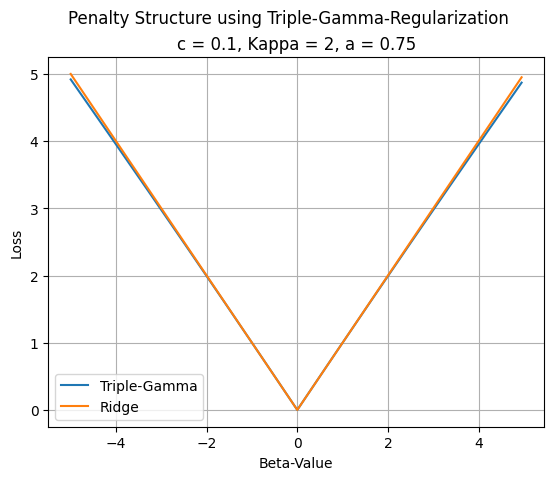

In [6]:
### Structure of the Penalty for different values in a
# Set the some values for a (Given that a>0.5) and the remaining parameters
a_values = [1]
c = 30
kappa = 1
lamda = 1
y_values_LASSO = list()
y_values_RIDGE = list()
y_values_arctan = list()
y_values_Gaussian = list()

# Plot the function log(-U(.,.,.)) for each value of a
for a in a_values:
    y_values = list()
    for x in x_values:
        phi = (2*c)/((kappa**2)*a)
        y_value = lamda*((-1)*hyperu.log_hyperu(torch.tensor([[c+0.5]]),torch.tensor([[1.5-a]]),(torch.tensor([[x]])**2)/(2*phi))+hyperu.log_hyperu(torch.tensor([[c+0.5]]),torch.tensor([[1.5-a]]),torch.tensor([[0.0]])))
        y_values.append(y_value.item())
        y_values_LASSO.append(x**2)
        y_values_RIDGE.append(abs(x))
        y_values_Gaussian.append((1-np.e**(-x**2)))
        y_values_arctan.append((2/np.pi)*np.arctan(abs(x)))
    plt.plot(x_values, y_values, label="Triple-Gamma")
    #plt.plot(x_values, y_values_LASSO, label="LASSO")
    plt.plot(x_values, y_values_RIDGE, label="Ridge")
    #plt.plot(x_values, y_values_arctan, label="arctan")
    #plt.plot(x_values, y_values_Gaussian, label="Gaussian")



# Add labels and title
plt.xlabel('Beta-Value')
plt.ylabel('Loss')
plt.suptitle('Penalty Structure using Triple-Gamma-Regularization')
plt.title('c = 0.1, Kappa = 2, a = 0.75')
plt.legend()
plt.grid(True)
plt.savefig("021_simulation_figures/simpleTGpenalty.png")
plt.show()

#### Variations in the Input Parameters
##### Changes in _a_

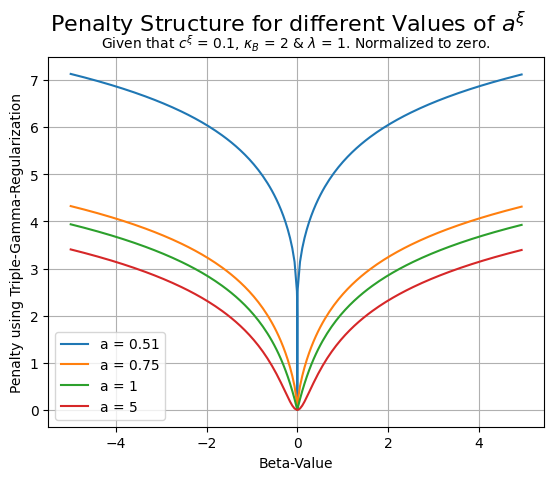

In [7]:
### Structure of the Penalty for different values in a
# Set the some values for a (Given that a>0.5) and the remaining parameters
a_values = [0.51,0.75,1,5]
c = 0.1
kappa = 2
lamda = 1

# Plot the function log(-U(.,.,.)) for each value of a
for a in a_values:
    y_values = list()
    for x in x_values:
        phi = (2*c)/((kappa**2)*a)
        y_value = lamda*(-1)*hyperu.log_hyperu(torch.tensor([[c+0.5]]),torch.tensor([[1.5-a]]),(torch.tensor([[x]])**2)/(2*phi))+hyperu.log_hyperu(torch.tensor([[c+0.5]]),torch.tensor([[1.5-a]]),torch.tensor([[0.0]]))
        y_values.append(y_value.item())
    plt.plot(x_values, y_values, label=f'a = {a}')

# Add labels and title
plt.xlabel('Beta-Value')
plt.ylabel('Penalty using Triple-Gamma-Regularization')
plt.suptitle(f'Penalty Structure for different Values of $a^\\xi$', fontsize=16)
plt.title(f'Given that $c^\\xi$ = {c}, $\\kappa_B$ = {kappa} & $\\lambda$ = {lamda}. Normalized to zero.', fontsize=10)

plt.legend()
plt.grid(True)
plt.savefig("021_simulation_figures/TGPenalty_ChangeInA.png")
plt.show()

##### Changes in _c_

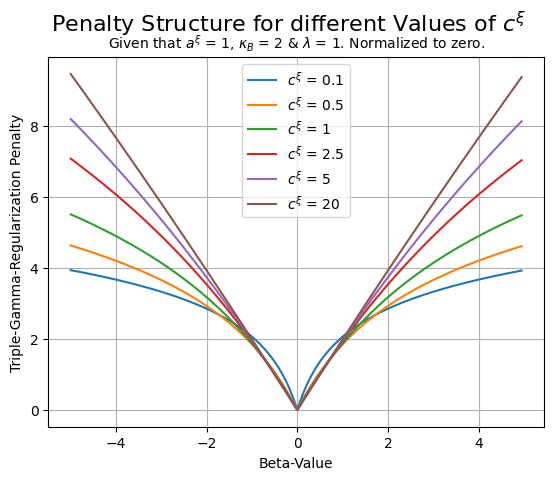

In [8]:
### Structure of the Penalty for different values in c - Part 1
# Set the some values for c (Given that c > 0) and the remaining parameters
c_values = [0.1, 0.5,1,2.5,5,20]
#c_values = [35]
a = 1
kappa = 2
lamda = 1

# Plot the function log(-U(.,.,.)) for each value of c
for c in c_values:
    y_values = list()
    for x in x_values:
        phi = (2*c)/((kappa**2)*a)
        y_value = lamda*(-1)*hyperu.log_hyperu(torch.tensor([[c+0.5]]),torch.tensor([[1.5-a]]),(torch.tensor([[x]])**2)/(2*phi))+hyperu.log_hyperu(torch.tensor([[c+0.5]]),torch.tensor([[1.5-a]]),torch.tensor([[0.0]]))
        y_values.append(y_value.item())
    plt.plot(x_values, y_values, label=f'$c^\\xi$ = {c}')

# Add labels and title
plt.xlabel('Beta-Value')
plt.ylabel('Triple-Gamma-Regularization Penalty')
plt.suptitle(f'Penalty Structure for different Values of $c^\\xi$', fontsize=16)
plt.title(f'Given that $a^\\xi$ = {a}, $\\kappa_B$ = {kappa} & $\\lambda$ = {lamda}. Normalized to zero.', fontsize=10)
plt.legend()
plt.grid(True)
plt.savefig("021_simulation_figures/TGPenalty_ChangeInC_Part1.png")
plt.show()

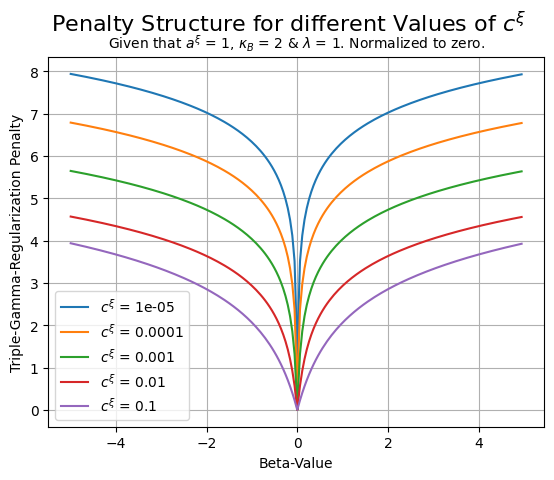

In [9]:
### Structure of the Penalty for different values in c - Part 2
# Set the some values for c (Given that c > 0) and the remaining parameters
c_values = [0.00001, 0.0001, 0.001, 0.01, 0.1]
#c_values = [35]
a = 1
kappa = 2
lamda = 1

# Plot the function log(-U(.,.,.)) for each value of c
for c in c_values:
    y_values = list()
    for x in x_values:
        phi = (2*c)/((kappa**2)*a)
        y_value = lamda*(-1)*hyperu.log_hyperu(torch.tensor([[c+0.5]]),torch.tensor([[1.5-a]]),(torch.tensor([[x]])**2)/(2*phi))+hyperu.log_hyperu(torch.tensor([[c+0.5]]),torch.tensor([[1.5-a]]),torch.tensor([[0.0]]))
        y_values.append(y_value.item())
    plt.plot(x_values, y_values, label=f'$c^\\xi$ = {c}')

# Add labels and title
plt.xlabel('Beta-Value')
plt.ylabel('Triple-Gamma-Regularization Penalty')
plt.suptitle(f'Penalty Structure for different Values of $c^\\xi$', fontsize=16)
plt.title(f'Given that $a^\\xi$ = {a}, $\\kappa_B$ = {kappa} & $\\lambda$ = {lamda}. Normalized to zero.', fontsize=10)
plt.legend()
plt.grid(True)
plt.savefig("021_simulation_figures/TGPenalty_ChangeInC_Part2.png")
plt.show()

##### Changes in Kappa

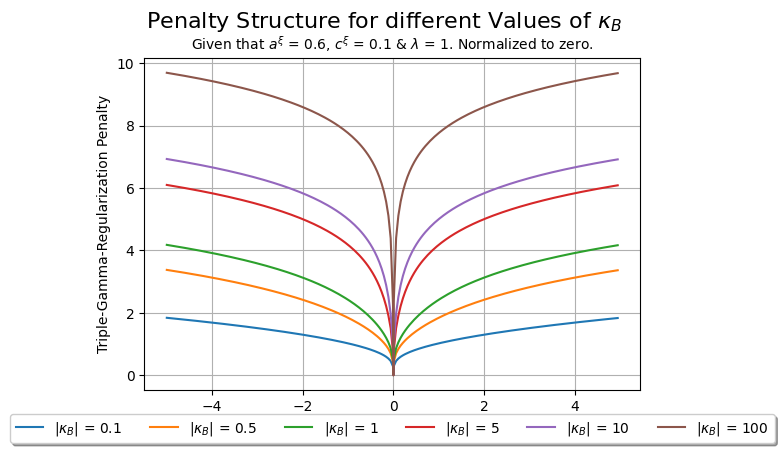

In [10]:
### Structure of the Penalty for different values in kappa
# Set the some values for kappa (Given that kappa > 0) and the remaining parameters
kappa_values = [0.1,0.5,1,5,10,100]
a = 0.6
c = 0.1
lamda = 1

# Plot the function log(-U(.,.,.)) for each value of kappa
for kappa in kappa_values:
    y_values = list()
    for x in x_values:
        phi = (2*c)/((kappa**2)*a)
        y_value = lamda*(-1)*hyperu.log_hyperu(torch.tensor([[c+0.5]]),torch.tensor([[1.5-a]]),(torch.tensor([[x]])**2)/(2*phi))+hyperu.log_hyperu(torch.tensor([[c+0.5]]),torch.tensor([[1.5-a]]),torch.tensor([[0.0]]))
        y_values.append(y_value.item())
    plt.plot(x_values, y_values, label=f'$|\\kappa_B|$ = {kappa}')

# Add labels and title
plt.xlabel(f'$\\beta$-Value')
plt.ylabel('Triple-Gamma-Regularization Penalty')
plt.suptitle(f'Penalty Structure for different Values of $\\kappa_B$', fontsize=16)
plt.title(f'Given that $a^\\xi$ = {a}, $c^\\xi$ = {c} & $\\lambda$ = {lamda}. Normalized to zero.', fontsize=10)
plt.legend()
plt.grid(True)
# Place the legend below the plot
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=6)

plt.savefig("021_simulation_figures/TGPenalty_ChangeInKappa.png", bbox_inches='tight')
plt.show()

### Comparison to other Penalties

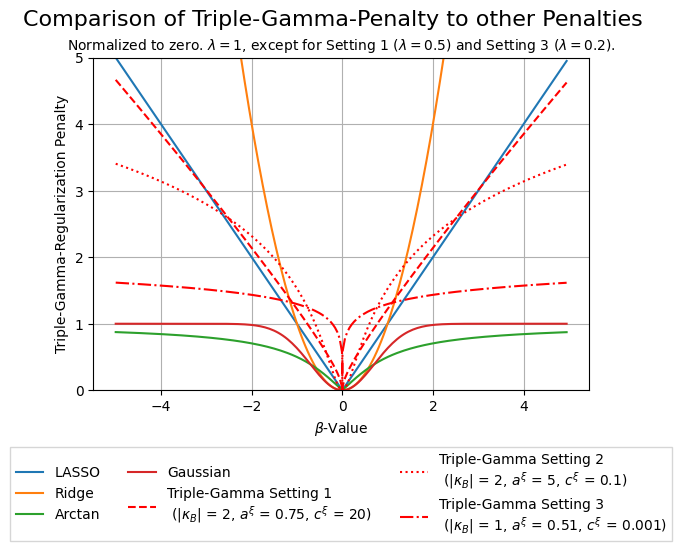

In [11]:
### TG Penalties compared to other ones
kappa1 = 2
a1 = 0.75
c1 = 0.1

kappa2 = 2
a2 = 5
c2 = 0.1

kappa3 = 1
a3 = 0.51
c3 = 0.01

lamda = 1

# Plot the function log(-U(.,.,.)) for each value of kappa
y_values_TG1 = list()
y_values_TG2 = list()
y_values_TG3 = list()
y_values_LASSO = list()
y_values_RIDGE = list()
y_values_arctan = list()
y_values_Gaussian = list()

y_values
for x in x_values:
    phi1 = (2*c1)/((kappa1**2)*a1)
    norm_factor =  hyperu.log_hyperu(torch.tensor([[c1+0.5]]),torch.tensor([[1.5-a1]]),torch.tensor([[0.0]]))
    penalty = hyperu.log_hyperu(torch.tensor([[c1+0.5]]),torch.tensor([[1.5-a1]]),(torch.tensor([[x]])**2)/(2*phi1))
    y_value = 0.5*(-1)*(penalty-norm_factor)
    y_values_TG1.append(y_value.item())
    
    phi2 = (2*c2)/((kappa2**2)*a2)
    penalty = hyperu.log_hyperu(torch.tensor([[c2+0.5]]),torch.tensor([[1.5-a2]]),(torch.tensor([[x]])**2)/(2*phi2))
    norm_factor = hyperu.log_hyperu(torch.tensor([[c2+0.5]]),torch.tensor([[1.5-a2]]),torch.tensor([[0.0]]))
    y_value = lamda*(-1)*(penalty - norm_factor)
    y_values_TG2.append(y_value.item())
    
    phi3 = (2*c3)/((kappa3**2)*a3)
    penalty = hyperu.log_hyperu(torch.tensor([[c3+0.5]]),torch.tensor([[1.5-a3]]),(torch.tensor([[x]])**2)/(2*phi3))
    norm_factor = hyperu.log_hyperu(torch.tensor([[c3+0.5]]),torch.tensor([[1.5-a3]]),torch.tensor([[0.0]]))
    y_value = 0.2*(-1)*(penalty - norm_factor)
    y_values_TG3.append(y_value.item())
    
    y_values_LASSO.append(abs(x))
    y_values_RIDGE.append(x**2)
    y_values_Gaussian.append((1-np.e**(-x**2)))
    y_values_arctan.append((2/np.pi)*np.arctan(abs(x)))
plt.plot(x_values, y_values_LASSO, label="LASSO")
plt.plot(x_values, y_values_RIDGE, label="Ridge")
plt.plot(x_values, y_values_arctan, label="Arctan")
plt.plot(x_values, y_values_Gaussian, label="Gaussian")
plt.plot(x_values, y_values_TG1, label=f'Triple-Gamma Setting 1\n ($|\\kappa_B|$ = {kappa1}, $a^\\xi$ = {a1}, $c^\\xi$ = {c1})', ls="--", color="red")
plt.plot(x_values, y_values_TG2, label=f'Triple-Gamma Setting 2\n ($|\\kappa_B|$ = {kappa2}, $a^\\xi$ = {a2}, $c^\\xi$ = {c2})', ls=":", color="red")
plt.plot(x_values, y_values_TG3, label=f'Triple-Gamma Setting 3\n ($|\\kappa_B|$ = {kappa3}, $a^\\xi$ = {a3}, $c^\\xi$ = {c3})', ls="-.", color="red")


# Add labels and title
plt.xlabel(f'$\\beta$-Value')
plt.ylabel('Triple-Gamma-Regularization Penalty')
plt.suptitle(f'Comparison of Triple-Gamma-Penalty to other Penalties', fontsize=16)
plt.title(f'Normalized to zero. $\\lambda = 1$, except for Setting 1 ($\\lambda = 0.5$) and Setting 3 ($\\lambda=0.2$).', fontsize=10)
plt.legend()
plt.grid(True)
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
ax.set_ylim([0, 5])
# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=False, shadow=False, ncol=3)

plt.savefig("021_simulation_figures/TGPenalty_Comparison.png", bbox_inches='tight')
plt.show()

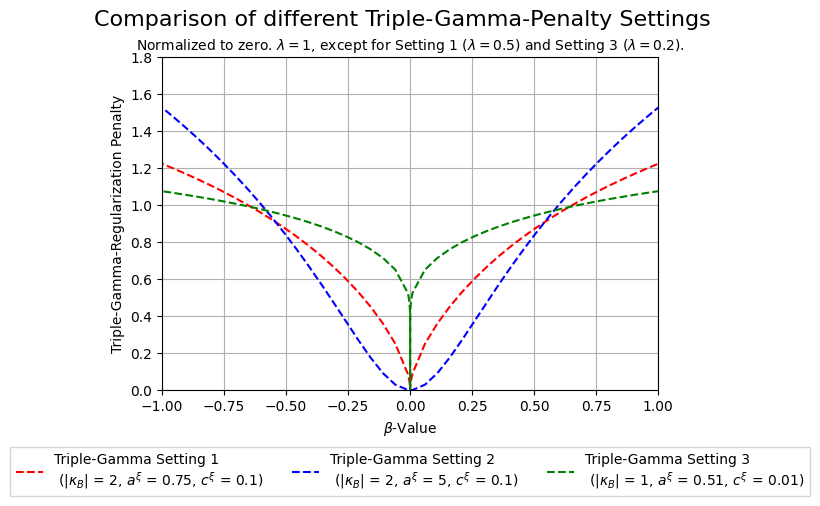

In [3]:
### Different Versions of the Triple Gamma Prior
kappa1 = 2
a1 = 0.75
c1 = 0.1

kappa2 = 2
a2 = 5
c2 = 0.1

kappa3 = 1
a3 = 0.51
c3 = 0.01

lamda = 1

# Plot the function log(-U(.,.,.)) for each value of kappa
y_values_TG1 = list()
y_values_TG2 = list()
y_values_TG3 = list()
y_values_LASSO = list()
y_values_RIDGE = list()
y_values_arctan = list()
y_values_Gaussian = list()


for x in x_values:
    phi1 = (2*c1)/((kappa1**2)*a1)
    norm_factor =  hyperu.log_hyperu(torch.tensor([[c1+0.5]]),torch.tensor([[1.5-a1]]),torch.tensor([[0.0]]))
    penalty = hyperu.log_hyperu(torch.tensor([[c1+0.5]]),torch.tensor([[1.5-a1]]),(torch.tensor([[x]])**2)/(2*phi1))
    y_value = 0.5*(-1)*(penalty-norm_factor)
    y_values_TG1.append(y_value.item())
    
    phi2 = (2*c2)/((kappa2**2)*a2)
    penalty = hyperu.log_hyperu(torch.tensor([[c2+0.5]]),torch.tensor([[1.5-a2]]),(torch.tensor([[x]])**2)/(2*phi2))
    norm_factor = hyperu.log_hyperu(torch.tensor([[c2+0.5]]),torch.tensor([[1.5-a2]]),torch.tensor([[0.0]]))
    y_value = lamda*(-1)*(penalty - norm_factor)
    y_values_TG2.append(y_value.item())
    
    phi3 = (2*c3)/((kappa3**2)*a3)
    penalty = hyperu.log_hyperu(torch.tensor([[c3+0.5]]),torch.tensor([[1.5-a3]]),(torch.tensor([[x]])**2)/(2*phi3))
    norm_factor = hyperu.log_hyperu(torch.tensor([[c3+0.5]]),torch.tensor([[1.5-a3]]),torch.tensor([[0.0]]))
    y_value = 0.2*(-1)*(penalty - norm_factor)
    y_values_TG3.append(y_value.item())

plt.plot(x_values, y_values_TG1, label=f'Triple-Gamma Setting 1\n ($|\\kappa_B|$ = {kappa1}, $a^\\xi$ = {a1}, $c^\\xi$ = {c1})', ls='--', color="red")
plt.plot(x_values, y_values_TG2, label=f'Triple-Gamma Setting 2\n ($|\\kappa_B|$ = {kappa2}, $a^\\xi$ = {a2}, $c^\\xi$ = {c2})', ls='--', color="blue")
plt.plot(x_values, y_values_TG3, label=f'Triple-Gamma Setting 3\n ($|\\kappa_B|$ = {kappa3}, $a^\\xi$ = {a3}, $c^\\xi$ = {c3})', ls='--', color="green")


# Add labels and title
plt.xlabel(f'$\\beta$-Value')
plt.ylabel('Triple-Gamma-Regularization Penalty')
plt.suptitle(f'Comparison of different Triple-Gamma-Penalty Settings', fontsize=16)
plt.title(f'Normalized to zero. $\\lambda = 1$, except for Setting 1 ($\\lambda = 0.5$) and Setting 3 ($\\lambda=0.2$).', fontsize=10)
plt.legend()
plt.grid(True)
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
ax.set_ylim([0, 1.8])
ax.set_xlim([-1, 1])
# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=False, shadow=False, ncol=3)

plt.savefig("021_simulation_figures/TGPenalty_DifferentSettings.png", bbox_inches='tight')
plt.show()

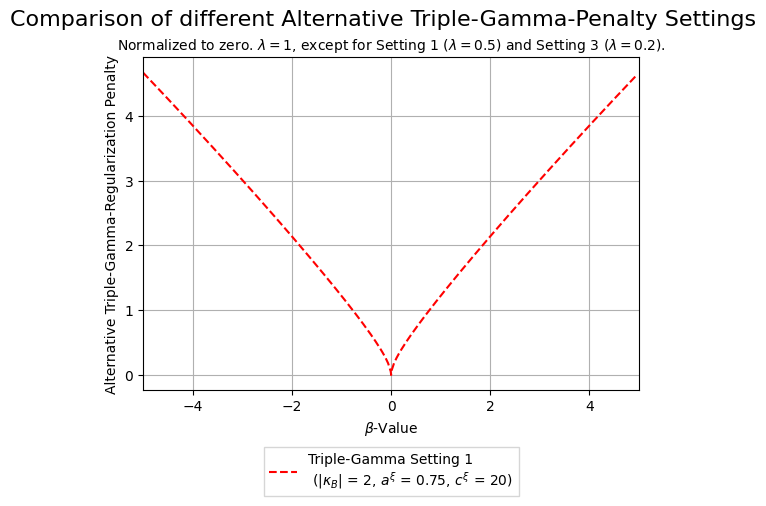

In [13]:
### Alternative Version of TGP
import log_hyperu_conv as alt_hyperu
kappa1 = 2
a1 = 0.75
c1 = 20

kappa2 = 2
a2 = 5
c2 = 0.1

kappa3 = 1
a3 = 0.51
c3 = 0.001

lamda = 1

# Plot the function log(-U(.,.,.)) for each value of kappa
y_values_TG1 = list()
y_values_TG2 = list()
y_values_TG3 = list()
y_values_LASSO = list()
y_values_RIDGE = list()
y_values_arctan = list()
y_values_Gaussian = list()

y_values
for x in x_values:
    phi1 = (2*c1)/((kappa1**2)*a1)
    norm_factor =  alt_hyperu.log_hyperu_conv(torch.tensor([[c1+0.5]]),torch.tensor([[1.5-a1]]),torch.tensor([[0.0]]))
    penalty = alt_hyperu.log_hyperu_conv(torch.tensor([[c1+0.5]]),torch.tensor([[1.5-a1]]),(torch.tensor([[x]])**2)/(2*phi1))
    y_value = 0.5*(-1)*(penalty-norm_factor)
    y_values_TG1.append(y_value.item())
    
    #phi2 = (2*c2)/((kappa2**2)*a2)
    #penalty = hyperu.log_hyperu_shift(torch.tensor([[c2+0.5]]),torch.tensor([[1.5-a2]]),(torch.tensor([[x]])**2)/(2*phi2))
    #norm_factor = hyperu.log_hyperu_shift(torch.tensor([[c2+0.5]]),torch.tensor([[1.5-a2]]),torch.tensor([[0.0]]))
    #y_value = lamda*(-1)*(penalty - norm_factor)
    #y_values_TG2.append(y_value.item())
    
    #phi3 = (2*c3)/((kappa3**2)*a3)
    #penalty = hyperu.log_hyperu_shift(torch.tensor([[c3+0.5]]),torch.tensor([[1.5-a3]]),(torch.tensor([[x]])**2)/(2*phi3))
    #norm_factor = hyperu.log_hyperu_shift(torch.tensor([[c3+0.5]]),torch.tensor([[1.5-a3]]),torch.tensor([[0.0]]))
    #y_value = 0.2*(-1)*(penalty - norm_factor)
    #y_values_TG3.append(y_value.item())

plt.plot(x_values, y_values_TG1, label=f'Triple-Gamma Setting 1\n ($|\\kappa_B|$ = {kappa1}, $a^\\xi$ = {a1}, $c^\\xi$ = {c1})', ls='--', color="red")
#plt.plot(x_values, y_values_TG2, label=f'Triple-Gamma Setting 2\n ($|\\kappa_B|$ = {kappa2}, $a^\\xi$ = {a2}, $c^\\xi$ = {c2})', ls='--', color="blue")
#plt.plot(x_values, y_values_TG3, label=f'Triple-Gamma Setting 3\n ($|\\kappa_B|$ = {kappa3}, $a^\\xi$ = {a3}, $c^\\xi$ = {c3})', ls='--', color="green")


# Add labels and title
plt.xlabel(f'$\\beta$-Value')
plt.ylabel('Alternative Triple-Gamma-Regularization Penalty')
plt.suptitle(f'Comparison of different Alternative Triple-Gamma-Penalty Settings', fontsize=16)
plt.title(f'Normalized to zero. $\\lambda = 1$, except for Setting 1 ($\\lambda = 0.5$) and Setting 3 ($\\lambda=0.2$).', fontsize=10)
plt.legend()
plt.grid(True)
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

ax.set_xlim([-5, 5])
# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=False, shadow=False, ncol=3)

plt.savefig("021_simulation_figures/TGP_Alternative.png", bbox_inches='tight')
plt.show()